# Project: Physical exam findings for DKA patients as a predictor for severity of GCS/cerebral edema.
## Members
- Nate Hayward - Nate.Hayward@hsc.utah.edu - u6031381
- Joshua Kawasaki - J.K.Kawasaki@utah.edu - u1424902
- Andrea Stofko - Andrea.Stofko@utah.edu - u6040357

---------------------------------------------------------------------------------------------------------------------------------------------
## Background and Motivation
---------------------------------------------------------------------------------------------------------------------------------------------
Diabetic ketoacidosis (DKA) is a severe and potentially life-threatening complication resulting from untreated or inadequately managed diabetes. It occurs when insufficient insulin levels prevent glucose from entering cells, causing the body to break down fats for energy. This process generates ketone bodies, which accumulate and lead to metabolic acidosis.

In advanced cases, DKA may cause significant neurological impairment, including severely altered mental status and potentially requiring intubation<sup>1</sup>. Medical teams frequently utilize the Glasgow Coma Scale (GCS or GCS-P) to evaluate neurological status systematically. Decreases in GCS scores accompanied by clinical signs such as abnormal respiratory patterns (e.g., Kussmaul respirations), persistent vomiting, or dehydration indicate severe DKA, necessitating urgent clinical intervention<sup>1</sup>.

Without timely intervention, DKA can result in critical complications, including electrolyte imbalances such as hyponatremia, hypokalemia, cerebral edema, cardiac arrhythmias, acute kidney injury, multi-organ failure, coma, and death<sup>2-9</sup>. Cerebral edema, while rare, significantly increases morbidity and mortality risk in pediatric populations, underscoring the necessity for prompt recognition and targeted management strategies.

DKA significantly impacts children, with approximately 30% of pediatric patients newly diagnosed with type 1 diabetes mellitus (T1DM) in the United States and Canada initially presenting with this complication<sup>10</sup>. Due to the chronic nature of diabetes, these patients face an ongoing risk for recurrent episodes of DKA. The annual incidence among pediatric patients with established T1DM is approximately 6-8%, highlighting the importance of ongoing preventive strategies and regular medical follow-up<sup>11</sup>.

Clinical and laboratory findings in pediatric DKA patients vary widely, influenced by differences in patient age and clinical presentation<sup>12</sup>. Currently, predicting which patients will develop cerebral edema or require escalation of care remains challenging. Identifying a specific constellation of exam findings predictive of clinical deterioration could significantly enhance triage and management, especially in resource-limited settings. Accurate prediction of deterioration could reduce morbidity and mortality associated with severe DKA.

---------------------------------------------------------------------------------------------------------------------------------------------
## Project Objectives
---------------------------------------------------------------------------------------------------------------------------------------------
This study aims to identify physical examination characteristics in pediatric patients with DKA that can predict the severity of altered mental status (as measured by the GCS), the need for urgent interventions such as intubation or imaging, escalation of care, or the development of cerebral edema. We also explored which specific physical exam abnormalities are most strongly correlated with severe clinical outcomes, such as significant neurological impairment or cerebral edema. The goal is to equip providers with key predictors to identify patients at higher risk of progression or decompensation, thus facilitating timely and appropriate intensive care.

The anticipated benefits of this research include:
* Improved risk stratification of pediatric patients with DKA at the time of initial presentation
* Development of clinical protocols and guidelines, leading to better patient outcomes through targeted early interventions
* Reduction in severe complications, such as cerebral edema, through early recognition of high-risk patients based on physical exam findings

We also hoped to gain experience in working with large datasets and leveraging the power of large databases to:
* Develop a pipeline for data cleaning, transforming, and organizing a large volume of raw data. This includes handling missing values, inconsistent data formats, structuring data for analysis, and systematically extracting and categorizing clinical text data.
* Use appropriate descriptive statistics and data visualizations to determine patterns in these data and display them to demonstrate the findings so that others may benefit from them.
* Use findings to augment clinical decision-making by demonstrating the importance and significance of physical exam findings in pediatric DKA patients.
    * Findings, if significant, would promote high-valued patient care that can be applied in any health care setting without the use of expensive resources (i.e., the physical exam is free of cost beyond the healthcare worker and may prevent unnecessary imaging/escalation of care).
* Implement and interpret regression models to analyze predictive relationships between physical exam findings and imaging outcomes.

---------------------------------------------------------------------------------------------------------------------------------------------
## Ethical Considerations
---------------------------------------------------------------------------------------------------------------------------------------------
Stakeholder Analysis:
* Primary Stakeholders:
    * Pediatric Patients: pediatric patients are directly affected by this study, particularly those presenting in DKA. The findings could inform better-targeted interventions for those who require intubation, or escalation of care, which could improve morbidity and mortality. 
    * Parents and Guardians: Parents are invested in the care of their children and the study findings may help improve the quality and accuracy of pediatric patient care.
* Secondary Stakeholders:
    * Healthcare Providers: Clinicians can use the findings of this project to guide treatment decisions, such as whether or not a child in DKA should be intubated, receive brain imaging, or escalate their care. The project may affect the way they assess and intervene in cases of severe altered mental status in pediatric DKA patients.
    * Healthcare Institutions: Hospitals may use the project findings to refine clinical guidelines and protocols. Additionally, improved decision-making may cut costs by reducing unnecessary workup including labs and imaging.
* Tertiary Stakeholders:
    * Researchers and Academics: Anyone working on related projects or within the field of pediatric critical care, emergency medicine, or endocrinology who may build on these findings or validate our predictions.
    * Public Health Organizations: Such as the American Academy of Pediatrics or other bodies interested in the improved management of DKA.
          

Ethical considerations:
* The potential benefit of our project is significant, as it may help identify children with DKA who are at high risk of requiring intubation, urgent imaging, and intensive care. However, any predictive model must also account for the risk of false positives (overestimating the need for intubation) and false negatives (missing those who do require intubation).
* Consideration: Regularly evaluate the accuracy and fairness of the model to ensure that it does not inadvertently cause harm by leading to unnecessary interventions or missed diagnoses. Ensure that the model recommendations are used in conjunction with clinical judgment to prevent potential harm to patients.
* Equitable Distribution of Burdens and Benefits: The benefits of the project could greatly impact pediatric care, particularly in identifying which children with DKA require the most intensive management. However, it is important to ensure that the benefits and burdens of the research are distributed equitably.
* Consideration: It is important to consider the diversity of the data. It is possible that the dataset is not representative of the entire pediatric population (e.g., underrepresentation of certain ethnic or socio-economic groups), and therefore the results of the model might not generalize well across all populations and could lead to inequities in care.

---------------------------------------------------------------------------------------------------------------------------------------------
## Data Description and Acquisition
---------------------------------------------------------------------------------------------------------------------------------------------
The Pediatric Emergency Care Applied Research Network (PECARN) provides publicly accessible datasets through their platform (https://pecarn.org/datasets/). Our current analysis utilizes data from the “Fluid Therapy and Cerebral Injury in Pediatric Diabetic Ketoacidosis (Fluid Therapy in DKA)”. Our team successfully obtained access and acquired the data, which comprises 40 CSV files detailing extensive clinical information from 1,389 unique pediatric patients, including physical examination findings, laboratory values, medical history, imaging results, discharge timing, and demographics.

This comprehensive dataset encompasses both quantitative measures (integers and floats) and qualitative descriptive fields (strings, formatted as two columns: a common term [Normal, Abnormal, Not Assessed] and a further description). 

---------------------------------------------------------------------------------------------------------------------------------------------
### Setup
---------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

---------------------------------------------------------------------------------------------------------------------------------------------
### Load and Inspect Physical Exam CSV 
---------------------------------------------------------------------------------------------------------------------------------------------
The physical exam file will serve as our primary dataset throughout the analysis. We will use the results found here as predictors of disease progression. The majority of our data cleaning will be focused on the physical exam file.

In [2]:
df_pe_original = pd.read_csv('PHYSEXAM.csv')

df_pe_original.head()

pd.set_option('display.max_columns', None) # View max columns
print(df_pe_original.columns.to_list())

df_pe_original.head()

['PUDID', 'StudyEvent', 'Occurrence', 'ItemGroupRepeatKey', 'PETime', 'PEHEENT', 'PEHEENTDesc', 'PECardio', 'PECardioDesc', 'PEResp', 'PERespDesc', 'PEGI', 'PEGIDesc', 'PEHepatic', 'PEHepaticDesc', 'PEGU', 'PEGUDesc', 'PERenal', 'PERenalDesc', 'PENeuro', 'PENeuroDesc', 'PEPsych', 'PEPsychDesc', 'PEEndo', 'PEEndoDesc', 'PEHema', 'PEHemaDesc', 'PEMusculo', 'PEMusculoDesc', 'PEDerm', 'PEDermDesc', 'PEAllergies', 'PEAllergiesDesc', 'PEImmune', 'PEImmuneDesc', 'PEAlcohol', 'PEAlcoholDesc', 'PEDAY']


,PUDID,StudyEvent,Occurrence,ItemGroupRepeatKey,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY
0,1,Study Initiation,0,0,1750,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0
1,2,Study Initiation,0,0,1145,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0
2,3,Study Initiation,0,0,1240,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0
3,4,Study Initiation,0,0,1354,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0
4,5,Study Initiation,0,0,1432,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0


In [3]:
#Checking - are these all study initiation events? - yes
df_pe_original['StudyEvent'].value_counts() 
df_pe_original['PUDID'].nunique() #1389 - ok, one row per patient
df_pe_original.shape

(1389, 38)

---------------------------------------------------------------------------------------------------------------------------------------------
## Data Cleaning
---------------------------------------------------------------------------------------------------------------------------------------------
Multiple pediatric endocrinologists were approached with the dataset findings to determine which abnormal physical exam findings were most consistent with DKA presentation. With this lens, we approached the physical exam finding entries methodically, stripping the user-entered description for DKA-associated terms. 

The first step in data cleaning involved transforming the categorical physical exam findings into structured binary indicators to facilitate quantitative analysis. Once we identified the most pertinent variables - as above - we iteratively developed regular expressions (regex) to convert these data to consistent, binary indicators for predictive modeling. For example, once we identified tachypnea as an important physical exam finding, we used regex to identify the presence of this term and all variable spellings to a present or not present column (`1` = present, `0` = not present) for each patient ID in the dataset. 

To avoid bias and to ensure successful regex development, each author independently developed initial regex patterns. Using this approach, the authors merged the regex expressions to develop the final model. This way, the expression extraction could be optimized to capture the greatest number of terms while avoiding manual extraction. 

Following the creation of the initial regex patterns, we applied the patterns using the `create_binary_flag` function to generate binary indicator variables. The accuracy of the extractions was then evaluated by reviewing the flagged cases, often using the `display_abnormal` function to improve our sensitivity and specificity to account for variable spellings and terminology in the data. Ultimately, the regex search strings developed by each group member were combined and optimized to create a unified and comprehensive set of patterns for each physical exam category. These transformed variables allowed for logistic regression modeling and statistical analyses to identify clinical predictors of the outcomes mentioned above.


### Defining functions to use for cleaning the description columns:

Here we create functions that will utilize regex statements to extract exam descriptions based on key words and phrases specific to each column. These will be used to compile and categorize findings.

In [4]:
def one_hot_encode(df, finding_columns):
    """
    One-hot encodes columns from df. If 'Abnormal', then 1.
    Strips whitespace from original column
    Returns df
    """

    for col in finding_columns:
        class_col = f'{col[2:]}_Class'  # Create class column name (e.g., HEENT_Class)
        df.loc[:, class_col] = df[col].apply(lambda x: 1 if x == 'Abnormal' else 0)
        df[col] = df[col].str.strip()

    return df


df_pe = df_pe_original[['PUDID', 'PETime', 'PEHEENT', 'PEHEENTDesc', 'PECardio', 'PECardioDesc', 
                        'PEResp', 'PERespDesc', 'PEGI', 'PEGIDesc', 'PEHepatic', 'PEHepaticDesc', 
                        'PEGU', 'PEGUDesc', 'PERenal', 'PERenalDesc', 'PENeuro', 'PENeuroDesc', 
                        'PEPsych', 'PEPsychDesc', 'PEEndo', 'PEEndoDesc', 'PEHema', 'PEHemaDesc', 
                        'PEMusculo', 'PEMusculoDesc', 'PEDerm', 'PEDermDesc', 'PEAllergies', 
                        'PEAllergiesDesc', 'PEImmune', 'PEImmuneDesc', 'PEAlcohol', 'PEAlcoholDesc', 
                        'PEDAY']].copy()
finding_columns = [
    'PEHEENT', 'PECardio', 'PEResp', 'PEGI', 'PEHepatic', 'PEGU', 'PERenal', 'PENeuro', 'PEPsych', 'PEEndo', 'PEHema', 'PEMusculo', 
    'PEDerm','PEAllergies', 'PEImmune', 'PEAlcohol']


one_hot_encode(df_pe, finding_columns)

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class
0,1,1750,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1145,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0
2,3,1240,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,1354,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,5,1432,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,1385,2247,Abnormal,dry mucous membranes,Abnormal,increased heart rate,Abnormal,increased work of breathing,Abnormal,nausea,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,-1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1385,1386,1030,Abnormal,lips dry,Abnormal,"capillary refill 3sec, lower extremity cool",Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1386,1387,2110,Abnormal,"decreased moisture in mouth, dry lips, adenopathy",Abnormal,tachycardia,Abnormal,hypopnea,Abnormal,"tenderness over the rectus, abdomen pain (diff...",Normal,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,back pain,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1387,1388,1430,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Defining functions for data cleaning
def analyze_term_counts(df, column_name, num_terms=10):
    """
    Prints the top N term counts in a specified column.
    """
    all_terms = df[column_name].str.split(expand=True).stack().str.lower()
    term_counts = all_terms.value_counts()
    for term, count in term_counts.head(num_terms).items():
        print(f"{term}: {count}")

def create_binary_flag(df, description_column, new_column, search_patterns, regex=True):
    """
    Creates a binary flag based on the presence of specified search patterns in the description column.
    regex = False -> treated as literal strings. When regex = True, you can use regex in the search_patterns
    """
    if description_column not in df.columns:
        raise ValueError(f"'{description_column}' not found in {df} columns.")
    if not search_patterns:
        return df

    df[new_column] = 0

    for pattern in search_patterns:
        if regex:
            df.loc[df[description_column].str.contains(pattern, case=False, na=False, regex=True) & (df[new_column] == 0), new_column] = 1
        else:
            df.loc[df[description_column].str.contains(pattern, case=False, na=False, regex=False) & (df[new_column] == 0), new_column] = 1

    return df

def display_abnormal(df, PE_column, desc_column, flag_column):
    """
    Displays rows where it's abnormal, sorted by the flag column.
    """
    pd.set_option('display.max_rows', None) # Displays max rows
    result = df.loc[df[PE_column] == 'Abnormal', [PE_column, desc_column, flag_column]].sort_values(by=flag_column, ascending=True)
    return result
    pd.reset_option('display.max_rows') # Resets to not outputting max rows

---------------------------------------------------------------------------------------------------------------------------------------------
In this section, we use one-hot encoding for each part of the physical exam. If any results were marked as 'abnormal' this will be a `1`, and 'normal' results will have a `0`. Each portion of the exam has a corresponding column for an optional description. Any results that are marked as abnormal will have a description that follows. This will be addressed in the next section of the data cleaning.

In [6]:
# HEENT Dry_MM
#analyze_term_counts(df_pe, 'PEHEENTDesc')

ENT_search = r'(?:dry|muc(?:ous|us)|mm|membrane|tacky)' # Capture dry/tacky mucous membranes
df_pe = create_binary_flag(df_pe, 'PEHEENTDesc', 'HEENT_DryMM', [ENT_search])

#display_abnormal(df_pe, 'PEHEENT', 'PEHEENTDesc', 'HEENT_DryMM')

In [7]:
# Cardio Tachy
#analyze_term_counts(df_pe, 'PECardioDesc')

tachy_search = r'ta(?:(?!pn)\w*ca|\w*chy(?!p)\w*)' # Capture tachycardia
increased_search = r'elevate|increas|raised he|inc[.\w\s]*HR' # Capture elevated heart rate
df_pe = create_binary_flag(df_pe, 'PECardioDesc', 'Cardio_Tachy', [tachy_search, increased_search])

#display_abnormal(df_pe, 'PECardio', 'PECardioDesc', 'Cardio_Tachy')

In [8]:
# Resp Tachy
#analyze_term_counts(df_pe, 'PERespDesc')

# Does not capture Hyperpnea
tachyp_search = r'(?!ta\w*ca)\btac\w*|\bkus\w*|\binc[.\w]+|rapid|fast|raise|\bwob\b' # Captures tachypnea
df_pe = create_binary_flag(df_pe, 'PERespDesc', 'Resp_Tachy', [tachyp_search])

#display_abnormal(df_pe, 'PEResp', 'PERespDesc', 'Resp_Tachy')

In [9]:
# Resp Kuss: Kussmaul breathing pattern on its own
#analyze_term_counts(df_pe, 'PERespDesc')

df_pe = create_binary_flag(df_pe, 'PERespDesc', 'Resp_Kuss', [r'\bkus\w*']) # Kussmaul breathing

#display_abnormal(df_pe, 'PEResp', 'PERespDesc', 'Resp_Kuss')

In [10]:
# GI Tender
#analyze_term_counts(df_pe, 'PEGIDesc')

df_pe = create_binary_flag(df_pe, 'PEGIDesc', 'GI_Tender', [r'tender\w*|TTP']) # Captures tender to palpitation

#display_abnormal(df_pe, 'PEGI', 'PEGIDesc', 'GI_Tender')

In [11]:
#GI - Nausea/Vomiting
#analyze_term_counts(df_pe, 'PEGIDesc')

df_pe = create_binary_flag(df_pe, 'PEGIDesc', 'GI_Vomit', [r'naus\w*|vomit\w*|emesis']) # Captures nausea/vomiting

#display_abnormal(df_pe, 'PEGI', 'PEGIDesc', 'GI_Vomit')

In [12]:
#GU - Polyuria
#analyze_term_counts(df_pe, 'PEGUDesc')

urine_search = r'^(?!.*no\s+urina\w*).*?\b(?:polyuria|increase|freq\w*|urin\w+|pee\w*)\b' # Captures polyuria and excludes not urinating
df_pe = create_binary_flag(df_pe, 'PEGUDesc', 'GU_Urination', [urine_search])

#display_abnormal(df_pe, 'PEGU', 'PEGUDesc', 'GU_Urination')


#Renal - Polyuria
#analyze_term_counts(df_pe, 'PERenalDesc')

df_pe = create_binary_flag(df_pe, 'PERenalDesc', 'GU_Urination', [urine_search]) # Added to same column 'GU_Urination'

#display_abnormal(df_pe, 'PERenal', 'PERenalDesc', 'GU_Urination')

In [13]:
#Neuro - Sleepy/Lethargic/Altered Mental Status/Somnolent/Listless/Fatigued/Tired/Drowsy

#analyze_term_counts(df_pe, 'PENeuroDesc')

sleepy = r'sleep\w*|letharg\w*|confus\w*|som\w+lent|drowsy|tired|fatigu|listless' # Captures fatigue
altered_MS = r'mental status|alter\w*|\bams\b|\bms\b|decreased\s+(?:loa|loc)|\b(?:loa|loc)\b|(?:slow|delay|slur|slug)[\w\s]*(?:respon|speech|answer)|obtun' # Captures altered mental status
GCS_under15 = r'(?:G(?:C|S)|Glasgow\s+coma\s+scale)\s*[\w\s]*[:=-]?\s*(?:[0-9]|1[0-4])' # Less than GCS 15
df_pe = create_binary_flag(df_pe, 'PENeuroDesc', 'Neuro_Sleepy', [sleepy, altered_MS, GCS_under15])

#display_abnormal(df_pe, 'PENeuro', 'PENeuroDesc', 'Neuro_Sleepy')



# PEPsych
df_pe = create_binary_flag(df_pe, 'PEPsychDesc', 'Neuro_Sleepy', [sleepy, altered_MS, GCS_under15]) # Added to same column 'Neuro_Sleepy'

#display_abnormal(df_pe, 'PEPsych', 'PEPsychDesc', 'Neuro_Sleepy')

In [14]:
#Psych - Agitated/Distressed/Irritable
#analyze_term_counts(df_pe, 'PEPsychDesc')

psych_search = r'\bagitat\w+|\bdistres\w+|\birritab\w+' # Captures agitation, distress, and irritability
df_pe = create_binary_flag(df_pe, 'PEPsychDesc', 'Psych_Agitated', [psych_search])

#display_abnormal(df_pe, 'PEPsych', 'PEPsychDesc', 'Psych_Agitated')

In [15]:
#Endo - ketotic breath/acetone breath
#analyze_term_counts(df_pe, 'PEEndoDesc')

endo_search = r'\bbreath\b|\bfruit' # Captures breath with ketotic/acetone breath
df_pe = create_binary_flag(df_pe, 'PEEndoDesc', 'Endo_Breath', [endo_search])

#display_abnormal(df_pe, 'PEEndo', 'PEEndoDesc', 'Endo_Breath')

In [16]:
#MSK - Thin - 'Cachectic'- 'Thin-appearing' 'Thin extremities' etc. 
#analyze_term_counts(df_pe, 'PEMusculoDesc')

cachectic_search = r'\bthin|\bcache\w*|\bskinny|atrophy|\bwast\w+' # Captures thin physical appearance
df_pe = create_binary_flag(df_pe, 'PEMusculoDesc', 'MSK_Thin', [cachectic_search])

#display_abnormal(df_pe, 'PEMusculo', 'PEMusculoDesc', 'MSK_Thin')

In [17]:
#MSK - Muscle Pain - 'Myalgia' 'Muscle Pain'
#analyze_term_counts(df_pe, 'PEMusculoDesc')

pain_search = r'\bpain|\bmyalgia|ach(?:e|i)\w*' # Captures musculoskeletal pain
df_pe = create_binary_flag(df_pe, 'PEMusculoDesc', 'MSK_Pain', [pain_search])

#display_abnormal(df_pe, 'PEMusculo', 'PEMusculoDesc', 'MSK_Pain')

In [18]:
# DERM - Pallor/Pale skin
# May be discriminatory for patients with darker skin?

#analyze_term_counts(df_pe, 'PEDermDesc')

pale_search = r'\bpal(?:e|lor|lid)' # Captures pale skin
df_pe = create_binary_flag(df_pe, 'PEDermDesc', 'Derm_Pale', [pale_search])

#display_abnormal(df_pe, 'PEDerm', 'PEDermDesc', 'Derm_Pale')

In [19]:
# DERM - Dry skin
#analyze_term_counts(df_pe, 'PEDermDesc')

dry_search = r'\bdry|\bdried' # Captures dry skin
df_pe = create_binary_flag(df_pe, 'PEDermDesc', 'Derm_DrySkin', [dry_search])

#display_abnormal(df_pe, 'PEDerm', 'PEDermDesc', 'Derm_DrySkin')

In [20]:
df_pe.head(10)

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin
0,1,1750,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1145,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
2,3,1240,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
3,4,1354,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1432,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
5,6,1029,Normal,NaN,Abnormal,Tachycardic,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,7,1216,Normal,NaN,Abnormal,tachycardic,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,pale,Not Assessed,NaN,Abnormal,pale,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7,8,1855,Abnormal,dry mucosa,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1855,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Mild diffuse abdominal tenderness,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,"Polydypsia, Polyphagia",Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,10,2140,Abnormal,"dry mucous membranes, injection eyes",Abnormal,"tachychardic, per triage note: cap refill less...",Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,concern for DKA,Normal,NaN,Normal,NaN,Abnormal,dry,Normal,NaN,Normal,NaN,Normal,NaN,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


### Converting Physical Exam Time to a DateTime data type

In order to compare time between the physical exam and the imaging time, both of these columns will be converted from an int to a datetime in each of the datasets.

In [21]:
#converting PETime to datetime

#first convert to string for date time function
df_pe['PETime'] = (df_pe['PETime']).astype(str)

#some values are single digits - assuming there are leading zeros
df_pe.loc[df_pe["PETime"] == "0", "PETime"] = "0000"
df_pe.loc[df_pe["PETime"] == "1", "PETime"] = "0001"
df_pe.loc[df_pe["PETime"] == "2", "PETime"] = "0002"
df_pe.loc[df_pe["PETime"] == "4", "PETime"] = "0004"
df_pe.loc[df_pe["PETime"] == "9", "PETime"] = "0009"

#convert to time
df_pe['PETime'] = pd.to_datetime(df_pe['PETime'], format='%H%M').dt.time# Print the DataFrameprint(df)
df_pe.head()

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin
0,1,17:50:00,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,11:45:00,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
2,3,12:40:00,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
3,4,13:54:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,14:32:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


### Importing Imaging Data CSV

We will clean the imaging csv and merge it into the main physical exam dataframe using the patient identifier (PUDID).

In [22]:
#load in imaging data
imaging = pd.read_csv("IMAGING.csv")
imaging.head()

,PUDID,StudyEvent,Occurrence,ItemGroupRepeatKey,ImageTime,ImageType,IMAGEDAY
0,13,DKA Treatment,0,1,2207,CT,0
1,17,DKA Treatment,0,1,29,CT,1
2,40,DKA Treatment,0,1,1615,CT,0
3,42,DKA Treatment,0,1,101,CT,1
4,43,DKA Treatment,0,1,1315,CT,0


#### Converting imaging time to a %H%M datetime data type

In [23]:
#change time to datetime
imaging['ImageTime'] = imaging['ImageTime'].astype(str).str.zfill(4) #add leading zeros where time is less than 4 digits
#convert to time
imaging['ImageTime'] = pd.to_datetime(imaging['ImageTime'], format='%H%M').dt.time # Print the DataFrameprint(df)

### Merging cleaned imaging dataset into the main physical exam dataset on PUDID

In [24]:
#merge dataframes
df_pe_imaging = pd.merge(df_pe, imaging, how ='outer', on ='PUDID') 

#drop extra columns
df_pe_imaging.drop(['StudyEvent','Occurrence', 'ItemGroupRepeatKey'], axis = 1)
df_pe_imaging.head()
#df_pe_imaging.shape #there are some patients with multiple imaging times

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,StudyEvent,Occurrence,ItemGroupRepeatKey,ImageTime,ImageType,IMAGEDAY
0,1,17:50:00,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11:45:00,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,12:40:00,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,13:54:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,14:32:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Converting imaging times to actual date times based on IMAGEDAY and PEDAY

Rather than providing the actual date, each patient observation for both the physical exam and imaging dataset contains a PEDAY (Physical Exam Day) and ImageDay column which is in reference to the admission date. For instance, if the physical exam took place on the day of the admission, the PEDAY column would be 0. If the imaging took place the next day, the ImageDay would be 1. Therefore, arbitrary dates were selected as a reference date for the admission that would allow us to effectively compare the time between events.

In [25]:
#creating reference date - change if there is a real reference date for each patient visit

df_pe_imaging["ImageTime"] = df_pe_imaging["ImageTime"].astype(str)
df_pe_imaging["PETime"] = df_pe_imaging["PETime"].astype(str)

# Convert ImageTime to timedelta
df_pe_imaging["ImageTime"] = pd.to_timedelta(df_pe_imaging["ImageTime"])
df_pe_imaging["PETime"] = pd.to_timedelta(df_pe_imaging["PETime"])

# Set reference date
reference_date = pd.to_datetime("2025-01-01")

# Compute full datetime
df_pe_imaging["ImagingDateTime"] = reference_date + pd.to_timedelta(df_pe_imaging["IMAGEDAY"], unit="D") + df_pe_imaging["ImageTime"]
df_pe_imaging["ExamDateTime"] = reference_date + pd.to_timedelta(df_pe_imaging["PEDAY"], unit="D") + df_pe_imaging["PETime"]

df_pe_imaging.head()

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,StudyEvent,Occurrence,ItemGroupRepeatKey,ImageTime,ImageType,IMAGEDAY,ImagingDateTime,ExamDateTime
0,1,0 days 17:50:00,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 17:50:00
1,2,0 days 11:45:00,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 11:45:00
2,3,0 days 12:40:00,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 12:40:00
3,4,0 days 13:54:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 13:54:00
4,5,0 days 14:32:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 14:32:00


#### Create column to capture the total number of abnormal test results:

In [26]:
df_pe_imaging['exam_total'] = df_pe_imaging['HEENT_DryMM']+ df_pe_imaging['Cardio_Tachy'] + df_pe_imaging['Resp_Tachy'] +df_pe_imaging['Resp_Kuss'] + df_pe_imaging['GI_Tender'] + df_pe_imaging['GI_Vomit'] + df_pe_imaging['GU_Urination'] + df_pe_imaging['Neuro_Sleepy'] + df_pe_imaging['Psych_Agitated'] + df_pe_imaging['Endo_Breath'] + df_pe_imaging['MSK_Thin'] +df_pe_imaging['MSK_Pain'] +df_pe_imaging['Derm_Pale'] + df_pe_imaging['Derm_DrySkin']
df_pe_imaging.head()

,PUDID,PETime,PEHEENT,PEHEENTDesc,PECardio,PECardioDesc,PEResp,PERespDesc,PEGI,PEGIDesc,PEHepatic,PEHepaticDesc,PEGU,PEGUDesc,PERenal,PERenalDesc,PENeuro,PENeuroDesc,PEPsych,PEPsychDesc,PEEndo,PEEndoDesc,PEHema,PEHemaDesc,PEMusculo,PEMusculoDesc,PEDerm,PEDermDesc,PEAllergies,PEAllergiesDesc,PEImmune,PEImmuneDesc,PEAlcohol,PEAlcoholDesc,PEDAY,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,StudyEvent,Occurrence,ItemGroupRepeatKey,ImageTime,ImageType,IMAGEDAY,ImagingDateTime,ExamDateTime,exam_total
0,1,0 days 17:50:00,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 17:50:00,0
1,2,0 days 11:45:00,Normal,NaN,Abnormal,Tachycardic HR 120,Abnormal,"Tachypnea, RR 24",Abnormal,Vomiting,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,Lethargic,Normal,NaN,Abnormal,DKA,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 11:45:00,3
2,3,0 days 12:40:00,Abnormal,dry mouth,Abnormal,"capillary refill ~ 5 seconds, weak peripheral ...",Abnormal,Kussmaul's respirations,Normal,NaN,Normal,NaN,Not Assessed,NaN,Abnormal,large urine output in ED,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,Normal,NaN,Not Assessed,NaN,Not Assessed,NaN,Normal,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 12:40:00,4
3,4,0 days 13:54:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Abnormal,thin/cachectic,Normal,NaN,Normal,NaN,Abnormal,"bruise on arm, scab on knee",Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 13:54:00,1
4,5,0 days 14:32:00,Abnormal,dry mucous membranes,Normal,NaN,Normal,NaN,Abnormal,diffuse tenderness to palpation,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,Normal,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaT,NaN,NaN,NaT,2025-01-01 14:32:00,2


## Importing Demographics Data

**Using the Codebook, variables are assigned as follows:**
* Sex = Sex
* Ethnicity = Ethnicity 
* Race 1 = American Indian or Alaska Native 
* Race 2 = Asian
* Race 3 = Black or African American
* Race 3 = Native Hawaiian or Other Pacific Islander 
* Race 5 = White
* Race 92 = Unknown or Not Reported
* AgeInYears = Age in years

### Load demographics and inspect dataframe:

Here each of the columns are coded according to how they are defined in the study codebook. Summary statistics were created for sex, ethnicity, race and age using the `value_counts()` and `describe()` functions.

In [27]:
df_demo = pd.read_csv('Demographics.csv')

df_demo = df_demo[['PUDID', 'Sex', 'Ethnicity', 'Race1', 'Race2', 'Race3', 'Race4', 'Race5', 'Race92', 'AgeInYears']]

#Rename the columns 
df_demo = df_demo.rename(columns={
    'Race1': 'American Indian or Alaska Native',
    'Race2': 'Asian',
    'Race3': 'Black or African American',
    'Race4': 'Native Hawaiian or Other Pacific Islander',
    'Race5': 'White',
    'Race92': 'Unknown or Not Reported',
    'AgeInYears': 'Age'
})

#Total number of patients
total = len(df_demo['PUDID'])
print("Total number of patients:", total)

# Create a dictionary to store value counts for each category
summary_data = {
    'Sex': df_demo['Sex'].value_counts(),
    'Ethnicity': df_demo['Ethnicity'].value_counts(),
    'American Indian or Alaska Native': df_demo['American Indian or Alaska Native'].value_counts(), 
    'Asian': df_demo['Asian'].value_counts(),
    'Black or African American': df_demo['Black or African American'].value_counts(),
    'Native Hawaiian or Other Pacific Islander': df_demo['Native Hawaiian or Other Pacific Islander'].value_counts(),
    'White': df_demo['White'].value_counts(),
    'Unknown or Not Reported': df_demo['Unknown or Not Reported'].value_counts(),
}

#Convert dictionary to DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df)

df_demo['Age'].describe(percentiles = [.25, .5, .75])

Total number of patients: 1389
                          Sex  Ethnicity  American Indian or Alaska Native  \
Female                  739.0        NaN                               NaN   
Hispanic or Latino        NaN      228.0                               NaN   
Male                    650.0        NaN                               NaN   
No                        NaN        NaN                            1369.0   
Not Hispanic or Latino    NaN     1109.0                               NaN   
Unknown                   NaN       52.0                               NaN   
Yes                       NaN        NaN                              20.0   

                         Asian  Black or African American  \
Female                     NaN                        NaN   
Hispanic or Latino         NaN                        NaN   
Male                       NaN                        NaN   
No                      1374.0                     1063.0   
Not Hispanic or Latino     NaN         

count    1389.000000
mean       11.607329
std         4.072595
min         0.536986
25%         9.224216
50%        12.221918
75%        14.632877
max        17.994521
Name: Age, dtype: float64

### Additional cleaning of demographics data:

For each of the race columns, the values "Yes"/"No" are replaced with 1s and 0s to simplify creating bar charts for counts.

In [28]:
#Changing Race to 1/0s for easier plotting
df_demo[['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander',
'White','Unknown or Not Reported']] = (df_demo[['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander',
'White','Unknown or Not Reported']]).replace({"Yes":1, "No":0})
df_demo.head()

C:\Users\joshu\AppData\Local\Temp\ipykernel_37368\3686076929.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'White','Unknown or Not Reported']]).replace({"Yes":1, "No":0})


,PUDID,Sex,Ethnicity,American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or Other Pacific Islander,White,Unknown or Not Reported,Age
0,1,Male,Hispanic or Latino,0,0,0,0,1,0,10.621918
1,2,Male,Hispanic or Latino,0,0,1,0,0,0,17.479452
2,3,Male,Not Hispanic or Latino,0,0,0,0,1,0,16.438162
3,4,Male,Not Hispanic or Latino,0,0,0,0,1,0,13.194521
4,5,Male,Hispanic or Latino,0,0,0,0,1,0,12.073770


---------------------------------------------------------------------------------------------------------------------------------------------
## Exploratory Analysis
---------------------------------------------------------------------------------------------------------------------------------------------
Once initial data cleaning steps were completed, exploratory analysis was performed to understand the composition of the study cohort and prevalence of abnormal test results. Of the 1,389 patients, 53% were female and 47% were male. The cohort was predominantly white (72%). All participants were between 0-18 years of age, with  a mean age of 11.6 (SD=4.07).

Of the fourteen exam findings that were included, the most common abnormal results were dry mucous membranes, tachycardia, tachypnea, and Kussmaul breathing. On average, patients had 2 abnormal findings reported. 

#### Histogram of Patient Age:

In [29]:
#import matplot lib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

<Figure size 1000x600 with 0 Axes>

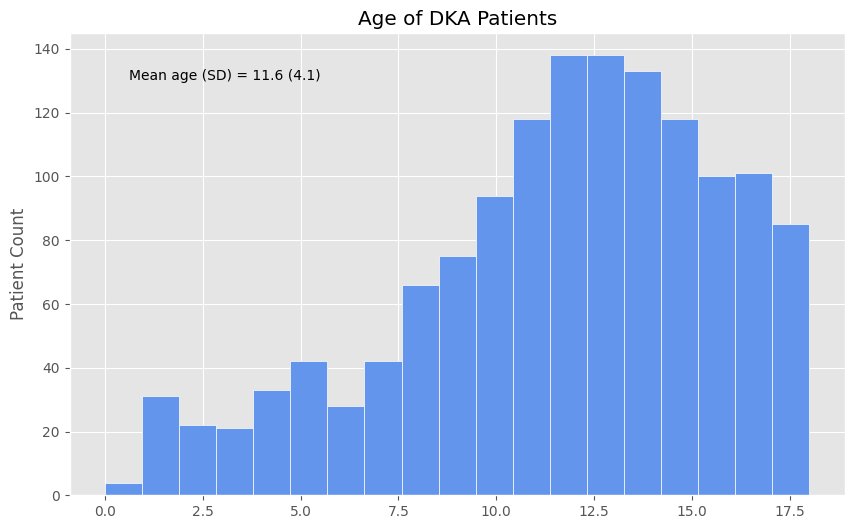

In [30]:
#histogram for age
fig = plt.figure(figsize = (10,6))

fig, ax = plt.subplots()
ax.hist(df_demo['Age'],
        bins = 19,
        range = (0,18),
                color = 'cornflowerblue',
       edgecolor = 'white') 
ax.set_title("Age of DKA Patients")
ax.set_ylabel("Patient Count")
ax.text(0.2, 0.9, "Mean age (SD) = 11.6 (4.1)", fontsize=10, ha="center", transform=ax.transAxes)

plt.show();

#### Showing distribution of patient races using a barchart:

(A more condensed Table 1 was used for the First Milestone document)

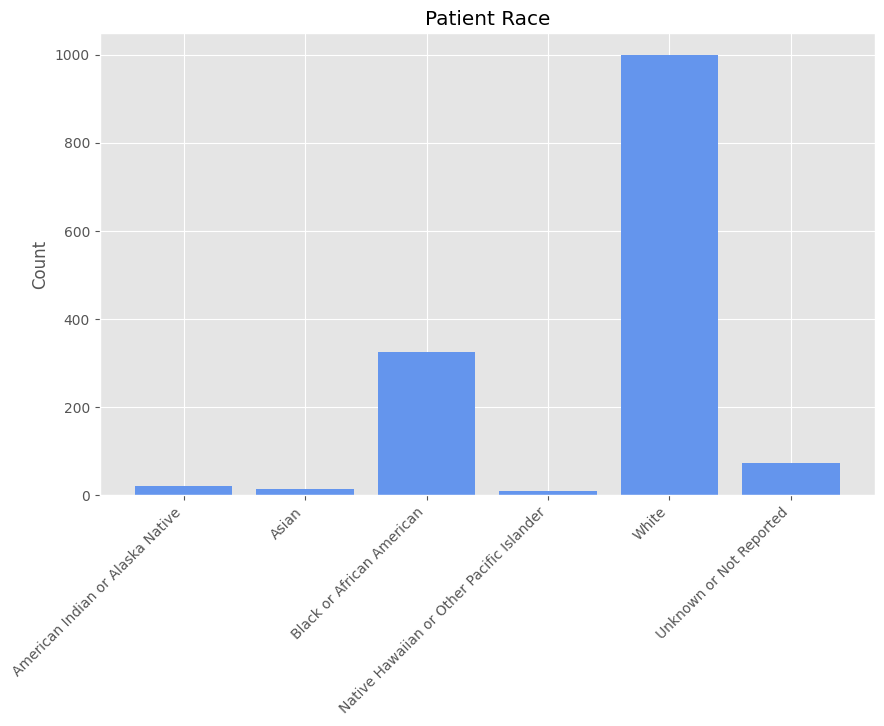

In [31]:
#create race counts

#subset dataframe for just race columns
race_counts = df_demo[['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander',
'White','Unknown or Not Reported']].sum()

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(race_counts.index, race_counts.values,
                color = 'cornflowerblue')
       
ax.set_title("Patient Race")
ax.set_ylabel("Count")
plt.xticks(rotation = 45, ha = 'right')

plt.show()

### Looking at distribution of total number of abnormal results (exam_total)

<Figure size 1000x600 with 0 Axes>

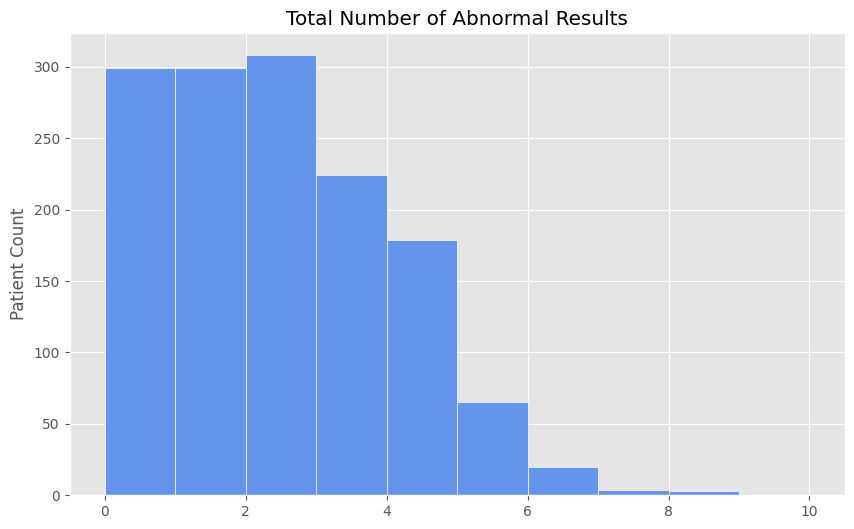

In [32]:
#histogram for exam totals
fig = plt.figure(figsize = (10,6))

fig, ax = plt.subplots()
ax.hist(df_pe_imaging['exam_total'],
        bins = 10,
        range = (0,10),
                color = 'cornflowerblue',
       edgecolor = 'white') 
ax.set_title("Total Number of Abnormal Results")
ax.set_ylabel("Patient Count")


plt.show()

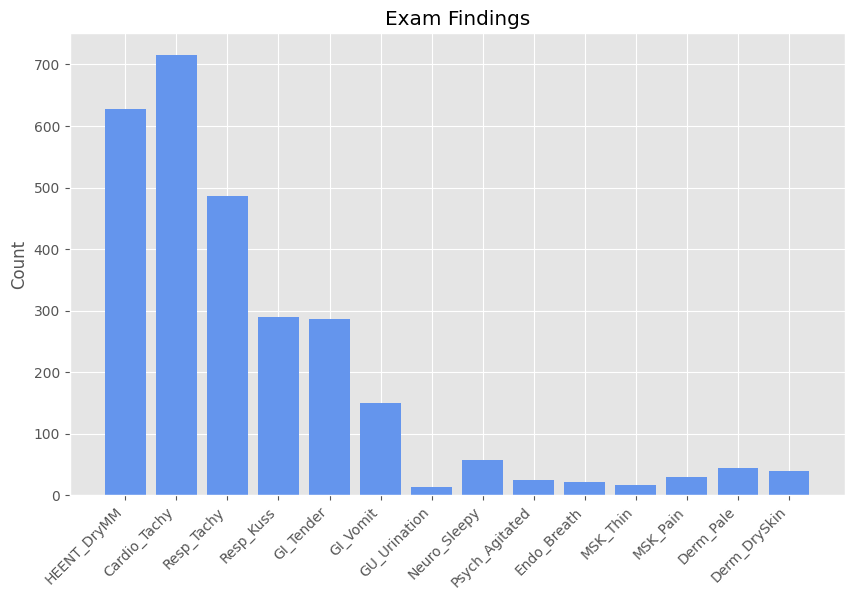

In [33]:
#subset dataframe for just race columns
exam_counts = df_pe_imaging[['HEENT_DryMM', 'Cardio_Tachy', 'Resp_Tachy','Resp_Kuss', 'GI_Tender',
'GI_Vomit', 'GU_Urination', 'Neuro_Sleepy','Psych_Agitated', 'Endo_Breath', 'MSK_Thin', 'MSK_Pain', 'Derm_Pale','Derm_DrySkin']].sum()

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(exam_counts.index, exam_counts.values,
                color = 'cornflowerblue')
       
ax.set_title("Exam Findings")
ax.set_ylabel("Count")
plt.xticks(rotation = 45, ha = 'right')

plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------
## Logistic Regression
---------------------------------------------------------------------------------------------------------------------------------------------
Logistic regression analysis was employed to explore potential predictive relationships, with abnormal physical findings as independent variables and severe neurological outcomes (defined by low GCS scores or imaging evidence of cerebral edema) as dependent variables. The model accuracy was assessed using measures such as sensitivity, specificity, area under the receiver operating characteristic curve (AUC-ROC), confusion matrices, and calibration plots.

### Logistic Regression for Imaging

In [34]:
#pip install imbalanced-learn -q

In [35]:
# imports and setup
import scipy as sc
from scipy.stats import norm
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import matplotlib.colors 
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE

**Create subset of dataset for Imagining Logistic Regression**

Only using cleaned predictive binary variables and imaging as outcome variable

In [36]:
#data for logistic regression - did patients receive imaging?
imaging_predict1 = df_pe_imaging[['PUDID','HEENT_Class',
       'Cardio_Class', 'Resp_Class', 'GI_Class', 'Hepatic_Class', 'GU_Class',
       'Renal_Class', 'Neuro_Class', 'Psych_Class', 'Endo_Class', 'Hema_Class',
       'Musculo_Class', 'Derm_Class', 'Allergies_Class', 'Immune_Class',
       'Alcohol_Class', 'HEENT_DryMM', 'Cardio_Tachy', 'Resp_Tachy',
       'Resp_Kuss', 'GI_Tender', 'GI_Vomit', 'GU_Urination', 'Neuro_Sleepy',
       'Psych_Agitated', 'Endo_Breath', 'MSK_Thin', 'MSK_Pain', 'Derm_Pale',
       'Derm_DrySkin','ImagingDateTime']]

**Create binary column for imaging**

If patient has a valid ImagingDateTime, mark Imaging as 1

In [37]:
#create binary imaginig column and drop time
imaging_predict = imaging_predict1.copy()
imaging_predict['Imaging'] = imaging_predict['ImagingDateTime'].notna().astype(int)
imaging_predict = imaging_predict.drop(columns = {'ImagingDateTime'})
imaging_predict.head()

,PUDID,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,Imaging
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Split the Imaging data into X/y for Logistic Regression**

In [38]:
#assign X and y
X= imaging_predict.drop(columns = {'PUDID','Imaging'}) #also removing PUDID for logistic regression
y= imaging_predict['Imaging']

In [39]:
#How imbalanced is y?
print(y.value_counts())

Imaging
0    1337
1      64
Name: count, dtype: int64


Using typical train_test_split did not work and created very unbalanced training/testing data - using SMOTE technique to combat this.

**Use SMOTE to create training set with more instances of Imaging = 1**

**Run Logistic Regression**

In [40]:
#try using SMOTE to balance:
smote = SMOTE(random_state=13)
X_resampled, y_resampled = smote.fit_resample(X, y)

#split data into training and testing from resampled SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=13)

#create model and fit data
logreg = LogisticRegression(random_state=13, max_iter = 2000)
logreg.fit(X_train, y_train)

#predicted values for y
y_pred = logreg.predict(X_test)

**Use Confusion Matrix to evaluate predictive results of Logistic Regression**

In [41]:
#create confusion matrix
imaging_conf = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred)
print("Confusion Matrix")
print(imaging_conf)

#print results
print('Precision = ', metrics.precision_score(y_true = y_test, y_pred = y_pred)) #how many predicted 1's were 1's
print('Recall = ', metrics.recall_score(y_true = y_test, y_pred = y_pred)) #of those that were 1, how many were correctly identified?
print('F-score = ', metrics.f1_score(y_true = y_test, y_pred = y_pred))
print('Jaccard similarity score', metrics.jaccard_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[288  65]
 [ 75 241]]
Precision =  0.7875816993464052
Recall =  0.7626582278481012
F-score =  0.77491961414791
Jaccard similarity score 0.6325459317585301


**Create figure for confusion matrix**

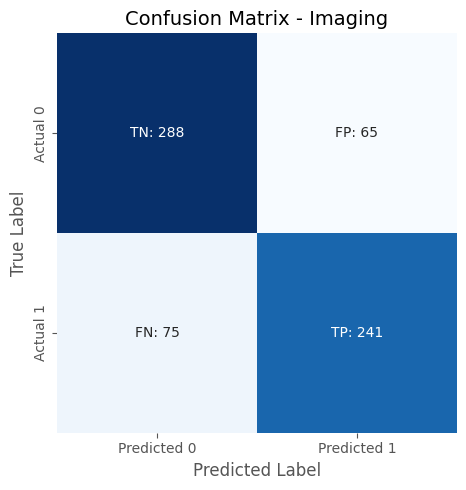

In [42]:
#confusion matrix for presentation

#labels for the axes
labels = np.array([[f'TN: {imaging_conf[0, 0]}', f'FP: {imaging_conf[0, 1]}'],
                   [f'FN: {imaging_conf[1, 0]}', f'TP: {imaging_conf[1, 1]}']])

#plot as heatmap using the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(imaging_conf, annot=labels, fmt='', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#add specifications
plt.title('Confusion Matrix - Imaging', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Odds Ratio to determine which variables had the most influence**

In [43]:
#What are the coefficients and odds ratios?
coefficients = logreg.coef_[0] #extract coefficients from logreg
odds_ratios = np.exp(coefficients) #convert to odds ratio

pred_probs = logreg.predict_proba(X)[:, 1]

#Compute the diagonal of the covariance matrix
X_design = np.hstack([np.ones((X.shape[0], 1)), X])  # add intercept
V = np.diagflat(pred_probs * (1 - pred_probs))  # weights
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)  # covariance matrix

#Extract standard errors (skip intercept)
standard_errors = np.sqrt(np.diag(cov_matrix))[1:]

#Compute confidence intervals for coefficients
z = norm.ppf(0.975)  # 95% CI
ci_lower = coefficients - z * standard_errors
ci_upper = coefficients + z * standard_errors

# Step 5: Convert to OR scale
or_ci_lower = np.exp(ci_lower)
or_ci_upper = np.exp(ci_upper)


#create data frame with independent variables
variables = X.columns  
coef_df = pd.DataFrame({
    'Variable': variables,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'CI Lower': or_ci_lower,
    'CI Upper': or_ci_upper    
})


# Sort by absolute coefficient size (optional)
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

#view top predictors (not sorted by absolute values)
coef_df.head(10)

,Variable,Coefficient,Odds Ratio,CI Lower,CI Upper
18,Resp_Tachy,1.909477,6.749560,2.303169,19.779944
7,Neuro_Class,1.801993,6.061716,4.335506,8.475230
0,HEENT_Class,1.197034,3.310285,2.060037,5.319315
8,Psych_Class,1.012395,2.752184,1.590075,4.763620
1,Cardio_Class,0.692038,1.997783,1.090497,3.659924
26,MSK_Thin,0.498924,1.646948,0.284198,9.544165
19,Resp_Kuss,0.346928,1.414715,0.913361,2.191267
3,GI_Class,0.197372,1.218197,0.799086,1.857127
27,MSK_Pain,0.075338,1.078249,0.197969,5.872739
17,Cardio_Tachy,0.068664,1.071076,0.588493,1.949394


**Creating ROC curve to analyze model performance**

In [44]:
print(logreg.predict_proba(X_test))

[[0.79104177 0.20895823]
 [0.33526808 0.66473192]
 [0.77391175 0.22608825]
 ...
 [0.44659973 0.55340027]
 [0.44659973 0.55340027]
 [0.81018689 0.18981311]]


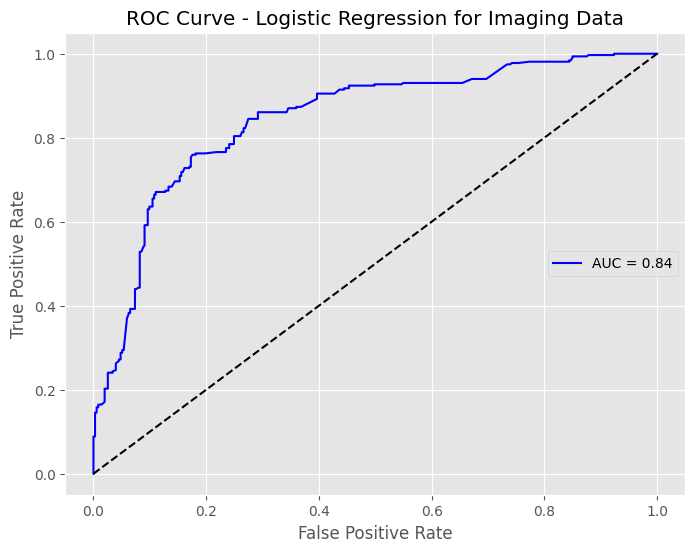

In [45]:
#import modules
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#what are the predicted probabilities for imaging = 1?
y_probs = logreg.predict_proba(X_test)[:, 1] 

#find ROC curve values - compare actual values to predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_probs) 

#calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color = 'blue')
plt.plot([0, 1], [0, 1], 'k--') #diagonal line for 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression for Imaging Data')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

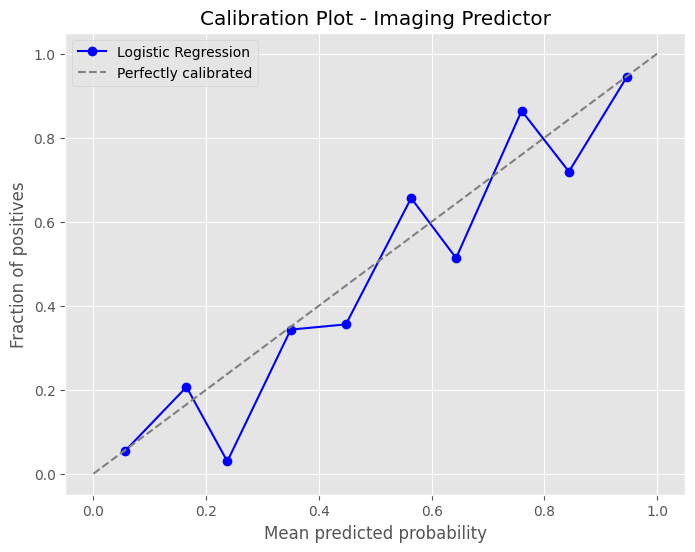

In [46]:
from sklearn.calibration import calibration_curve

#get predicted probabilities
y_probs = logreg.predict_proba(X_test)[:, 1] #find predicted probabilities of 1

#calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10, strategy='uniform')

#plot curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', color ='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')  #diagonal
plt.title('Calibration Plot - Imaging Predictor')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#Fit linear regression to calibration data
reg = LinearRegression().fit(prob_pred.reshape(-1, 1), prob_true)
calibration_slope = reg.coef_[0]

print(f"Calibration slope: {calibration_slope:.3f}")

Calibration slope: 1.023


### Logistic Regression for Predicting Glasgow scores

**Using 8 as the threshold to split the data**

(A score of 8 or less means that patients are usually intubated)

**Importing GCS Data**

In [48]:
#load glasgow data
glasgow = pd.read_csv('GCSLOG_GCS.csv')

#only keep pudid and gcstotal columns
gcs_min = glasgow[['PUDID', 'GCSTotal']].copy()

#create new df with PUDID and min GCS without each PUDID on a single row
gcs_min_simple = gcs_min.groupby('PUDID', as_index=False)['GCSTotal'].min()

#rename columns
gcs_min_simple.rename(columns={'GCSTotal': 'min_GCS'}, inplace=True)

gcs_min_simple.head()

,PUDID,min_GCS
0,1,15
1,2,14
2,3,15
3,4,15
4,5,15


In [49]:
gcs_min_simple.shape #this matches original dataframe

(1389, 2)

In [50]:
#creating data frame for escalation with same indepedent variables as with imaging
gcs_predict1 = pd.merge(imaging_predict, gcs_min_simple, how = 'left', on = 'PUDID')
gcs_predict2 = gcs_predict1.drop(columns = {'Imaging'})
gcs_predict2.drop_duplicates(inplace=True)
gcs_predict2.head()
gcs_predict3 = gcs_predict2.drop(columns = {'PUDID'})

**Split data based on GCS score**

In [51]:
#if patients have a score of 8 or lower, classify them as 1
gcs_predict3['GCS8_or_below'] = np.where(gcs_predict3['min_GCS'] < 9, 1, 0)
gcs_predict = gcs_predict3.drop(columns = {'min_GCS'}) #drop raw scores
gcs_predict.head()

,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,GCS8_or_below
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Splitting into predictors and outcome variables**

In [52]:
#assign X and y
X_gcs= gcs_predict.drop(columns = {'GCS8_or_below'}) 
y_gcs= gcs_predict['GCS8_or_below']

**Are the classes imbalanced?**

In [53]:
y_gcs.value_counts() #yes

GCS8_or_below
0    1375
1      14
Name: count, dtype: int64

**Use SMOTE and run Logistic Regression**

In [54]:
#try using SMOTE to balance:
smote = SMOTE(random_state=13)
X_gcs_resampled, y_gcs_resampled = smote.fit_resample(X_gcs, y_gcs)

#split data into training and testing from resampled SMOTE data
X_gcs_train, X_gcs_test, y_gcs_train, y_gcs_test = train_test_split(X_gcs_resampled, y_gcs_resampled, test_size=0.25, random_state=13)

#create model and fit data
logreg_gcs = LogisticRegression(random_state=13, max_iter = 2000)
logreg_gcs.fit(X_gcs_train, y_gcs_train)

#predicted values for y
y_gcs_pred = logreg_gcs.predict(X_gcs_test)

**Create Confusion Matrix and Print Metrics**

In [55]:
#create confusion matrix
imaging_conf_gcs = metrics.confusion_matrix(y_true = y_gcs_test, y_pred = y_gcs_pred)
print("Confusion Matrix")
print(imaging_conf)

#print results
print('Precision = ', metrics.precision_score(y_true = y_gcs_test, y_pred = y_gcs_pred)) #how many predicted 1's were 1's
print('Recall = ', metrics.recall_score(y_true = y_gcs_test, y_pred = y_gcs_pred)) #of those that were 1, how many were correctly identified?
print('F-score = ', metrics.f1_score(y_true = y_gcs_test, y_pred = y_gcs_pred))
print('Jaccard similarity score', metrics.jaccard_score(y_true = y_gcs_test, y_pred = y_gcs_pred))

Confusion Matrix
[[288  65]
 [ 75 241]]
Precision =  0.8270440251572327
Recall =  0.7993920972644377
F-score =  0.8129829984544049
Jaccard similarity score 0.6848958333333334


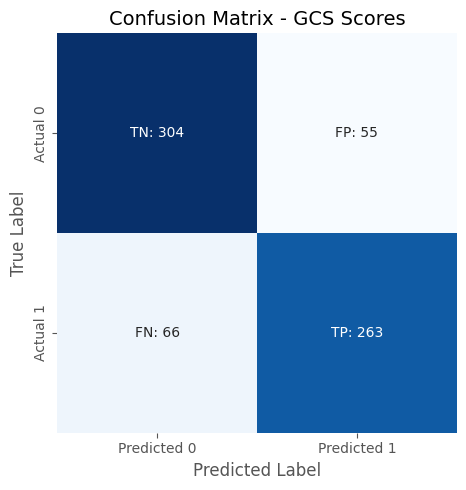

In [56]:
#confusion matrix for GCS Score

#labels for the axes
labels_gcs = np.array([[f'TN: {imaging_conf_gcs[0, 0]}', f'FP: {imaging_conf_gcs[0, 1]}'],
                   [f'FN: {imaging_conf_gcs[1, 0]}', f'TP: {imaging_conf_gcs[1, 1]}']])

#plot as heatmap using the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(imaging_conf_gcs, annot=labels_gcs, fmt='', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#add specifications
plt.title('Confusion Matrix - GCS Scores', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Odds Ratio and Coefficients for GCS Predictor**

In [57]:
#What are the coefficients and odds ratios?
coefficients_gcs = logreg_gcs.coef_[0] #extract coefficients from logreg
odds_ratios_gcs = np.exp(coefficients_gcs) #convert to odds ratio

pred_probs = logreg_gcs.predict_proba(X_gcs)[:, 1]

#Compute the diagonal of the covariance matrix
X_design = np.hstack([np.ones((X_gcs.shape[0], 1)), X_gcs])  # add intercept
V = np.diagflat(pred_probs * (1 - pred_probs))  # weights
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)  # covariance matrix

#Extract standard errors (skip intercept)
standard_errors = np.sqrt(np.diag(cov_matrix))[1:]

#Compute confidence intervals for coefficients
z = norm.ppf(0.975)  # 95% CI
ci_lower = coefficients_gcs - z * standard_errors
ci_upper = coefficients_gcs + z * standard_errors

# Step 5: Convert to OR scale
or_ci_lower = np.exp(ci_lower)
or_ci_upper = np.exp(ci_upper)


#create data frame with independent variables
variables_gcs = X_gcs.columns  
coef_df_gcs = pd.DataFrame({
    'Variable': variables_gcs,
    'Coefficient': coefficients_gcs,
    'Odds Ratio': odds_ratios_gcs,
    'CI Lower': or_ci_lower,
    'CI Upper': or_ci_upper    
})

#sort by absolute coefficient size (optional)
coef_df_gcs = coef_df_gcs.sort_values(by='Coefficient', ascending=False)

#view top predictors (not sorted by absolute values)
coef_df_gcs.head(10)

,Variable,Coefficient,Odds Ratio,CI Lower,CI Upper
7,Neuro_Class,2.961857,19.333838,12.141024,30.787955
1,Cardio_Class,1.893184,6.640480,3.336530,13.216120
25,Endo_Breath,1.019184,2.770933,0.790546,9.712365
2,Resp_Class,0.654871,1.924894,0.767053,4.830458
19,Resp_Kuss,0.638983,1.894553,1.094859,3.278349
0,HEENT_Class,0.379625,1.461737,0.835658,2.556877
26,MSK_Thin,0.060459,1.062324,0.113333,9.957662
15,Alcohol_Class,-0.073140,0.929470,0.006688,129.173933
27,MSK_Pain,-0.099860,0.904964,0.101569,8.063086
18,Resp_Tachy,-0.328151,0.720254,0.266982,1.943075


**ROC Curve for GCS Score**

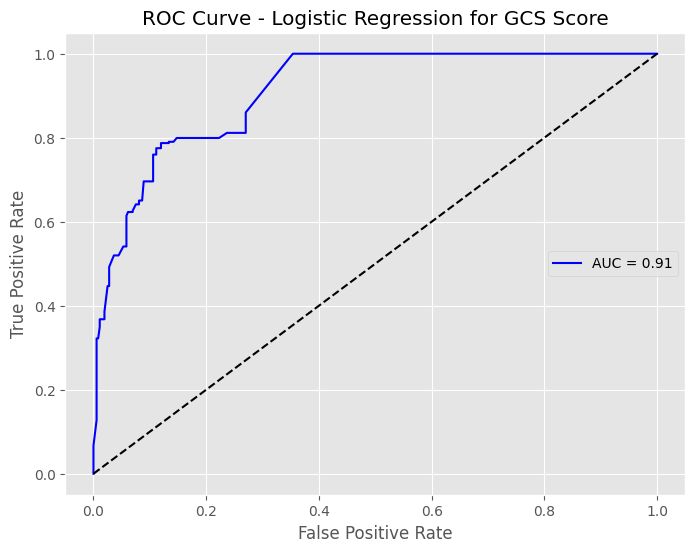

In [58]:
#what are the predicted probabilities for GCS_below_8 = 1?
y_gcs_probs = logreg_gcs.predict_proba(X_gcs_test)[:, 1] 

#find ROC curve values - compare actual values to predicted probabilities
fpr, tpr, thresholds = roc_curve(y_gcs_test, y_gcs_probs) 

#calculate AUC score
auc_score_gcs = roc_auc_score(y_gcs_test, y_gcs_probs)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score_gcs:.2f}', color = 'blue')
plt.plot([0, 1], [0, 1], 'k--') #diagonal line for 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression for GCS Score')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

**Calibration Plot**

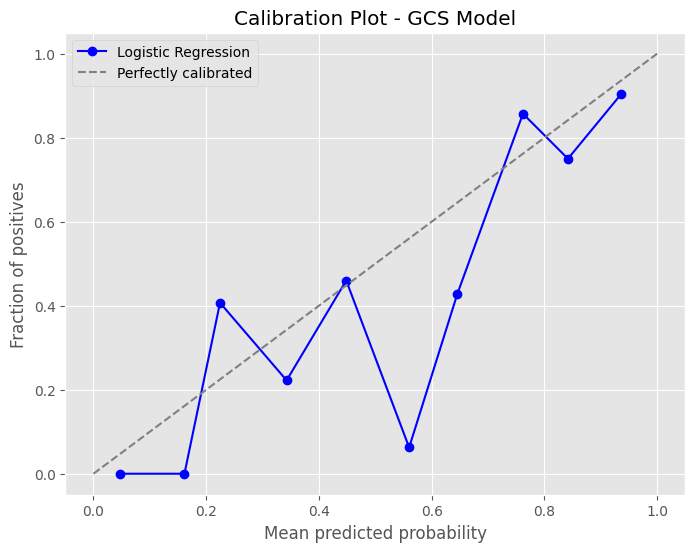

In [59]:
#get predicted probabilities
y_gcs_probs = logreg.predict_proba(X_gcs_test)[:, 1] #find predicted probabilities of 1

#calibration curve
prob_true_gcs, prob_pred_gcs = calibration_curve(y_gcs_test, y_gcs_probs, n_bins=10, strategy='uniform')

#plot curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_gcs, prob_true_gcs, marker='o', color ='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')  #diagonal
plt.title('Calibration Plot - GCS Model')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
#Fit linear regression to calibration data
reg_gcs = LinearRegression().fit(prob_pred_gcs.reshape(-1, 1), prob_true_gcs)
calibration_slope_gcs = reg_gcs.coef_[0]

print(f"Calibration slope: {calibration_slope_gcs:.3f}")

Calibration slope: 0.951


### Logistic Regression for Escalation of Care

Use DISCHARGE data set and compare discharge time to the physical exam time. 
If DISCHARGE date is higher than 1, have this be yes for escalation of care.
Add data cleaning steps to this. 

**Most patients that had neurological decline had this occur within the first 12-24 hours**

In [61]:
#load in discharge data
discharge = pd.read_csv("DISCHARGE.csv")

#create new df called escalation to characterize if patient had escalation of care - considered discharge day > 1
escalation = discharge[['PUDID', 'CerebralEdema', 'DISCHARGEDAY']].copy()
#default column value to zero
escalation['Escalation'] = 0
#if the discharge day is greater than 1, make escalation 1, otherwise 0 means no escalation
escalation.loc[escalation['DISCHARGEDAY'] > 1, 'Escalation'] = 1 

#recode cerebral edema column, yes = 1, no = 0
escalation.loc[escalation['CerebralEdema'] == 'Yes', 'CerebralEdema'] = 1
escalation.loc[escalation['CerebralEdema'] == 'No', 'CerebralEdema'] = 0

#show results
escalation.head(10)

,PUDID,CerebralEdema,DISCHARGEDAY,Escalation
0,1,0,1,0
1,2,0,2,1
2,3,0,5,1
3,4,0,3,1
4,5,0,2,1
5,6,0,2,1
6,7,0,2,1
7,8,0,2,1
8,9,0,3,1
9,10,0,1,0


In [62]:
imaging_predict.shape #1401
df_pe.shape #1389

(1389, 65)

In [63]:
#creting data frame for escalation with same indepedent variables as with imaging
escalation_predict1 = pd.merge(imaging_predict, escalation, how = 'left', on = 'PUDID')
escalation_predict2 = escalation_predict1.drop(columns = {'Imaging'})
escalation_predict2.drop_duplicates(inplace=True)
escalation_predict2.shape

(1389, 34)

**finalized data frames for logistic regressions**

In [64]:
escalation_predict = escalation_predict2.drop(columns = {'PUDID','CerebralEdema', 'DISCHARGEDAY'})
escalation_predict.head()

,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,Escalation
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


**Split Data**

In [65]:
#assign X and y
X_esc= escalation_predict.drop(columns = {'Escalation'}) 
y_esc= escalation_predict['Escalation']

In [66]:
#Is this dataset balanced?
y_esc.value_counts() #fairly, but original confusion matrix showed poor results

Escalation
1    895
0    494
Name: count, dtype: int64

Although this class was split much more evenly than the previous examples, it still produced poor results when running the confusion matrix. Decided to resample since it was not an even split.

**Create training and testing data**

In [67]:
#try using SMOTE to balance:
smote = SMOTE(random_state=13)
X_esc_resampled, y_esc_resampled = smote.fit_resample(X_esc, y_esc)

#split data into training and testing from resampled SMOTE data
X_esc_train, X_esc_test, y_esc_train, y_esc_test = train_test_split(X_esc_resampled, y_esc_resampled, test_size=0.25, random_state=13)

#create model and fit data
logreg_esc = LogisticRegression(random_state=13, max_iter = 2000)
logreg_esc.fit(X_esc_train, y_esc_train)

#predicted values for y
y_esc_pred = logreg_esc.predict(X_esc_test)

**Confusion Matrix**

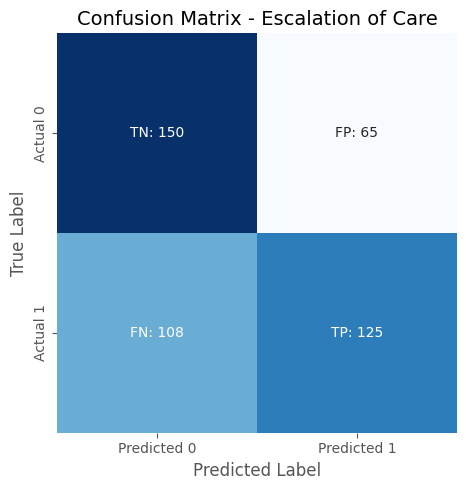

In [68]:
#create confusion matrix
imaging_conf_esc = metrics.confusion_matrix(y_true = y_esc_test, y_pred = y_esc_pred)

#labels for the axes
labels_esc = np.array([[f'TN: {imaging_conf_esc[0, 0]}', f'FP: {imaging_conf_esc[0, 1]}'],
                   [f'FN: {imaging_conf_esc[1, 0]}', f'TP: {imaging_conf_esc[1, 1]}']])

#plot as heatmap using the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(imaging_conf_esc, annot=labels_esc, fmt='', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

#add specifications
plt.title('Confusion Matrix - Escalation of Care', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Print Metrics**

In [69]:
#print results
print('Precision = ', metrics.precision_score(y_true = y_esc_test, y_pred = y_esc_pred)) #how many predicted 1's were 1's
print('Recall = ', metrics.recall_score(y_true = y_esc_test, y_pred = y_esc_pred)) #of those that were 1, how many were correctly identified?
print('F-score = ', metrics.f1_score(y_true = y_esc_test, y_pred = y_esc_pred))
print('Jaccard similarity score', metrics.jaccard_score(y_true = y_esc_test, y_pred = y_esc_pred))

Precision =  0.6578947368421053
Recall =  0.5364806866952789
F-score =  0.5910165484633569
Jaccard similarity score 0.41946308724832215


**Odds Ratio for Escalation of Care**

In [70]:
#What are the coefficients and odds ratios?
coefficients_esc = logreg_esc.coef_[0] #extract coefficients from logreg
odds_ratios_esc = np.exp(coefficients_esc) #convert to odds ratio
pred_probs = logreg_esc.predict_proba(X_esc)[:, 1]

#Compute the diagonal of the covariance matrix
X_design = np.hstack([np.ones((X_esc.shape[0], 1)), X_esc])  # add intercept
V = np.diagflat(pred_probs * (1 - pred_probs))  # weights
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)  # covariance matrix

#Extract standard errors (skip intercept)
standard_errors = np.sqrt(np.diag(cov_matrix))[1:]

#Compute confidence intervals for coefficients
z = norm.ppf(0.975)  # 95% CI
ci_lower = coefficients_esc - z * standard_errors
ci_upper = coefficients_esc + z * standard_errors

# Step 5: Convert to OR scale
or_ci_lower = np.exp(ci_lower)
or_ci_upper = np.exp(ci_upper)


#create data frame with independent variables
variables_esc = X_esc.columns  
coef_df_esc = pd.DataFrame({
    'Variable': variables_esc,
    'Coefficient': coefficients_esc,
    'Odds Ratio': odds_ratios_esc,
    'CI Lower': or_ci_lower,
    'CI Upper': or_ci_upper    
})

# Sort by absolute coefficient size (optional)
coef_df_esc = coef_df_esc.sort_values(by='Coefficient', ascending=False)

#view top predictors (not sorted by absolute values)
coef_df_esc.head(10)

,Variable,Coefficient,Odds Ratio,CI Lower,CI Upper
26,MSK_Thin,1.456157,4.289443,0.842872,21.829313
5,GU_Class,1.292243,3.640944,1.968261,6.735120
25,Endo_Breath,1.278550,3.591430,1.270740,10.150285
12,Derm_Class,1.036117,2.818252,1.865939,4.256595
8,Psych_Class,1.004862,2.731531,1.606130,4.645492
15,Alcohol_Class,0.810256,2.248485,0.200443,25.222555
10,Hema_Class,0.731800,2.078819,0.824365,5.242198
22,GU_Urination,0.708627,2.031200,0.421932,9.778303
7,Neuro_Class,0.696128,2.005970,1.490267,2.700130
1,Cardio_Class,0.472558,1.604092,0.926162,2.778251


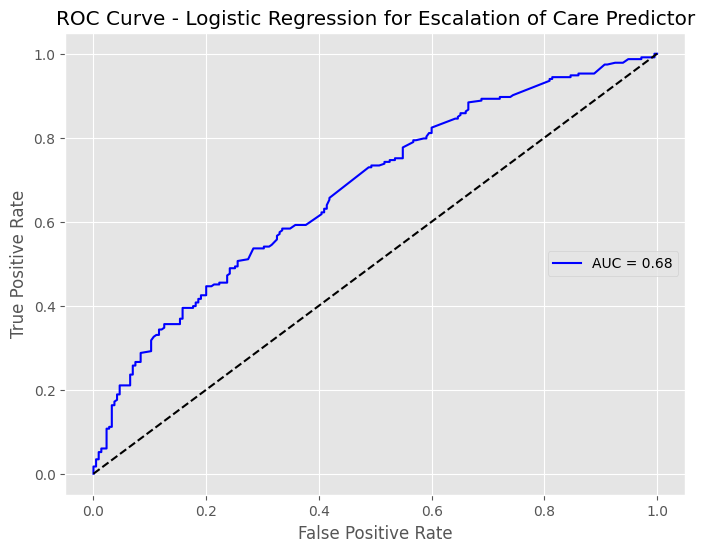

In [71]:
#what are the predicted probabilities for GCS_below_8 = 1?
y_esc_probs = logreg_esc.predict_proba(X_esc_test)[:, 1] 

#find ROC curve values - compare actual values to predicted probabilities
fpr, tpr, thresholds = roc_curve(y_esc_test, y_esc_probs) 

#calculate AUC score
auc_score_esc = roc_auc_score(y_esc_test, y_esc_probs)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score_esc:.2f}', color = 'blue')
plt.plot([0, 1], [0, 1], 'k--') #diagonal line for 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression for Escalation of Care Predictor')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

**Calibration Plot**

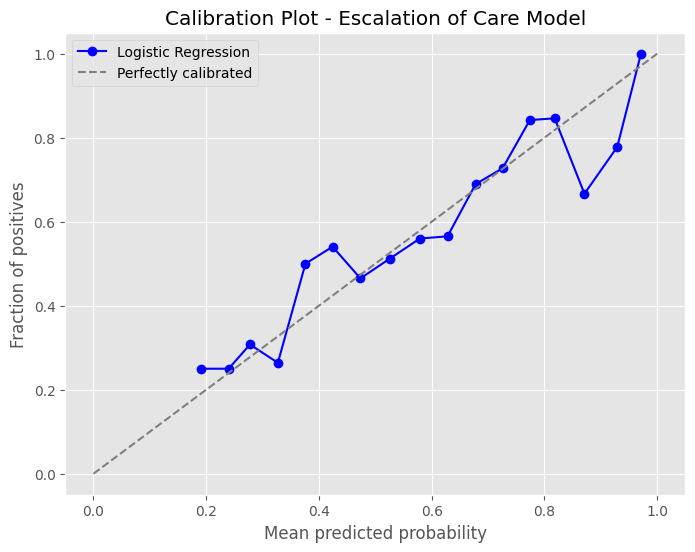

In [72]:
#get predicted probabilities
y_esc_probs = logreg_esc.predict_proba(X_esc_test)[:, 1]  #find predicted probabilities of 1

#calibration curve
prob_true_esc, prob_pred_esc = calibration_curve(y_esc_test, y_esc_probs, n_bins=20, strategy='uniform')

#plot curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_esc, prob_true_esc, marker='o', color ='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')  #diagonal
plt.title('Calibration Plot - Escalation of Care Model')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
#Fit linear regression to calibration data
reg_esc = LinearRegression().fit(prob_pred_esc.reshape(-1, 1), prob_true_esc)
calibration_slope_esc = reg_esc.coef_[0]

print(f"Calibration slope: {calibration_slope_esc:.3f}")

Calibration slope: 0.854


### Logistic Regression for Cerebral Edema 

In [74]:
ce_predict = escalation_predict2.drop(columns = {'PUDID','Escalation', 'DISCHARGEDAY'})
ce_predict['CerebralEdema'] = ce_predict['CerebralEdema'].astype(int)
ce_predict.head()

,HEENT_Class,Cardio_Class,Resp_Class,GI_Class,Hepatic_Class,GU_Class,Renal_Class,Neuro_Class,Psych_Class,Endo_Class,Hema_Class,Musculo_Class,Derm_Class,Allergies_Class,Immune_Class,Alcohol_Class,HEENT_DryMM,Cardio_Tachy,Resp_Tachy,Resp_Kuss,GI_Tender,GI_Vomit,GU_Urination,Neuro_Sleepy,Psych_Agitated,Endo_Breath,MSK_Thin,MSK_Pain,Derm_Pale,Derm_DrySkin,CerebralEdema
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [75]:
#assign X and y
X_ce = ce_predict.drop(columns = {'CerebralEdema'}) #also removing PUDID for logistic regression
y_ce = ce_predict['CerebralEdema']

**How imbalanced is the data? How many patients with cerebral edema?**

In [76]:
#How imbalanced is y?
print(y_ce.value_counts()) #VERY

CerebralEdema
0    1366
1      23
Name: count, dtype: int64


In [77]:
#try using SMOTE to balance:
smote = SMOTE(random_state=13)
X_ce_resampled, y_ce_resampled = smote.fit_resample(X_ce, y_ce)

#split data into training and testing
X_ce_train, X_ce_test, y_ce_train, y_ce_test = train_test_split(X_ce_resampled, y_ce_resampled, test_size=0.25, random_state=19)

#create model and fit data
logreg_ce = LogisticRegression(random_state=19, max_iter = 2000)
logreg_ce.fit(X_ce_train, y_ce_train)

#predicted values for y
y_ce_pred = logreg.predict(X_ce_test)

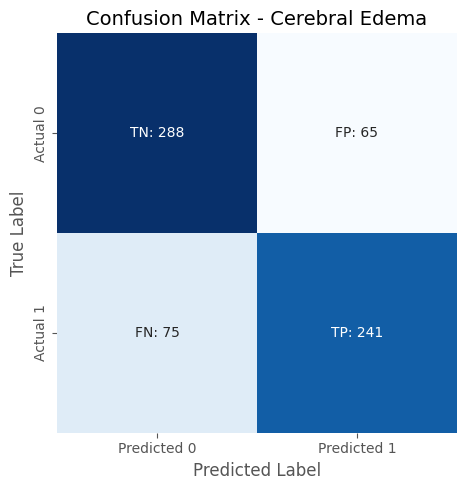

In [78]:
#confusion matrix for presentation
imaging_conf_ce = metrics.confusion_matrix(y_true = y_ce_test, y_pred = y_ce_pred)

#labels for the axes
labels_ce = np.array([[f'TN: {imaging_conf_ce[0, 0]}', f'FP: {imaging_conf_ce[0, 1]}'],
                   [f'FN: {imaging_conf_ce[1, 0]}', f'TP: {imaging_conf_ce[1, 1]}']])

#plot as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(imaging_conf_ce, annot=labels, fmt='', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix - Cerebral Edema', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [79]:
#print results
print('Precision = ', metrics.precision_score(y_true = y_ce_test, y_pred = y_ce_pred)) #how many predicted 1's were 1's
print('Recall = ', metrics.recall_score(y_true = y_ce_test, y_pred = y_ce_pred)) #of those that were 1, how many were correctly identified?
print('F-score = ', metrics.f1_score(y_true = y_ce_test, y_pred = y_ce_pred))
print('Jaccard similarity score', metrics.jaccard_score(y_true = y_ce_test, y_pred = y_ce_pred))

Precision =  0.801948051948052
Recall =  0.7373134328358208
F-score =  0.7682737169517885
Jaccard similarity score 0.6237373737373737


In [80]:
#What are the coefficients and odds ratios?
coefficients_ce = logreg_ce.coef_[0]
odds_ratios_ce = np.exp(coefficients_ce)

pred_probs = logreg_ce.predict_proba(X_ce)[:, 1]

#Compute the diagonal of the covariance matrix
X_design = np.hstack([np.ones((X_ce.shape[0], 1)), X_ce])  # add intercept
V = np.diagflat(pred_probs * (1 - pred_probs))  # weights
cov_matrix = np.linalg.inv(X_design.T @ V @ X_design)  # covariance matrix

#Extract standard errors (skip intercept)
standard_errors = np.sqrt(np.diag(cov_matrix))[1:]

#Compute confidence intervals for coefficients
z = norm.ppf(0.975)  # 95% CI
ci_lower = coefficients_ce - z * standard_errors
ci_upper = coefficients_ce + z * standard_errors

# Step 5: Convert to OR scale
or_ci_lower = np.exp(ci_lower)
or_ci_upper = np.exp(ci_upper)


#create data frame with independent variables
variables_ce = X_ce.columns  
coef_df_ce = pd.DataFrame({
    'Variable': variables_ce,
    'Coefficient': coefficients_ce,
    'Odds Ratio': odds_ratios_ce,
    'CI Lower': or_ci_lower,
    'CI Upper': or_ci_upper    
})

#sort by absolute coefficient size (optional)
coef_df_ce = coef_df_ce.sort_values(by='Coefficient', ascending=False)

coef_df_ce.head(10)

,Variable,Coefficient,Odds Ratio,CI Lower,CI Upper
18,Resp_Tachy,2.252769,9.514046,2.609441,34.688294
7,Neuro_Class,2.110216,8.250026,5.440765,12.509809
1,Cardio_Class,1.740499,5.700185,2.816320,11.537081
0,HEENT_Class,1.347932,3.849455,2.192248,6.759410
19,Resp_Kuss,0.349029,1.417690,0.863278,2.328156
26,MSK_Thin,0.118561,1.125876,0.089891,14.101524
20,GI_Tender,0.024105,1.024398,0.531375,1.974860
15,Alcohol_Class,-0.001611,0.998391,0.022183,44.933611
22,GU_Urination,-0.435060,0.647226,0.009883,42.386822
27,MSK_Pain,-0.484092,0.616256,0.054897,6.917941


**Most important factors:** Resp_Tachy, Neuro_Class, Cardio_Class,	HEENT_Class

**ROC Curve**

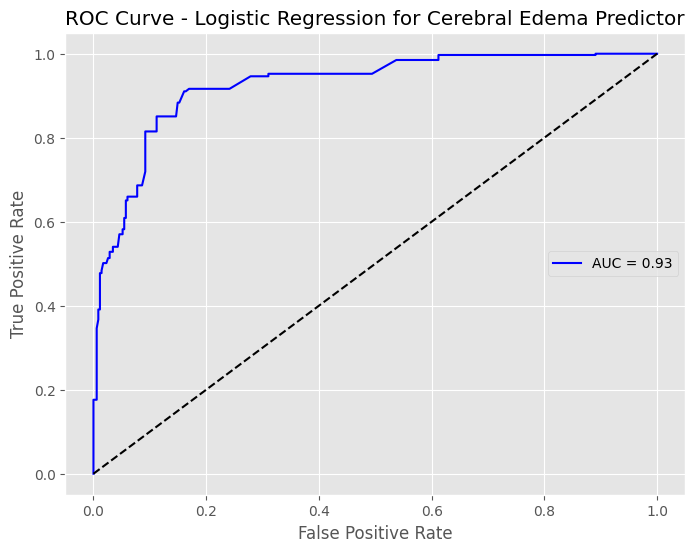

In [81]:
#what are the predicted probabilities for imaging = 1?
y_ce_probs = logreg_ce.predict_proba(X_ce_test)[:, 1]

#find ROC curve values - compare actual values to predicted probabilities
fpr_ce, tpr_ce, thresholds_ce = roc_curve(y_ce_test, y_ce_probs) 

#calculate AUC score
auc_score_ce = roc_auc_score(y_ce_test, y_ce_probs)

#plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ce, tpr_ce, label=f'AUC = {auc_score_ce:.2f}', color="blue")
plt.plot([0, 1], [0, 1], 'k--') #diagonal line for 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression for Cerebral Edema Predictor')
plt.legend(loc='center right')
plt.grid(True)
plt.show()

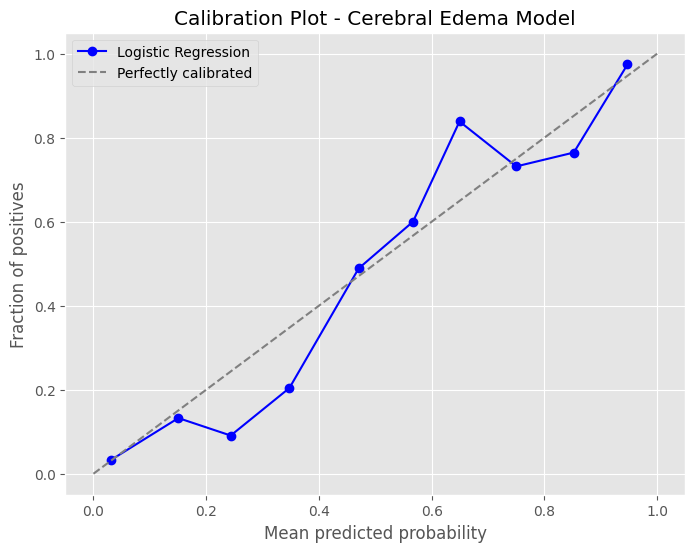

In [82]:
#get predicted probabilities
y_ce_probs = logreg_ce.predict_proba(X_ce_test)[:, 1] #find predicted probabilities of 1

#calibration curve
prob_true_ce, prob_pred_ce = calibration_curve(y_ce_test, y_ce_probs, n_bins=10, strategy='uniform')

#plot curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_ce, prob_true_ce, marker='o', color ='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')  #diagonal
plt.title('Calibration Plot - Cerebral Edema Model')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
#Fit linear regression to calibration data
reg_ce = LinearRegression().fit(prob_pred_ce.reshape(-1, 1), prob_true_ce)
calibration_slope_ce = reg_ce.coef_[0]

print(f"Calibration slope: {calibration_slope_ce:.3f}")

Calibration slope: 1.087


---------------------------------------------------------------------------------------------------------------------------------------------
## Discussion
---------------------------------------------------------------------------------------------------------------------------------------------
In this study, we aimed to identify physical examination findings in pediatric patients with diabetic ketoacidosis (DKA) that could serve as predictors of clinical deterioration, specifically regarding neurological decompensation, the need for imaging, escalation of care, and the development of cerebral edema. Using the dataset from a large, multicenter PECARN study, “Fluid Therapy and Cerebral Injury in Pediatric Diabetic Ketoacidosis,” we implemented a robust data-cleaning endeavor and applied logistic regression models to evaluate the predictive power of individual physical exam components. 

Our findings clearly demonstrate that certain physical exam abnormalities - particularly in the respiratory and neurologic categories - are strongly associated with severe clinical outcomes. For three of the four outcome models (imaging, low Glasgow Coma Scale (GCS ≤ 8), and cerebral edema), the most consistent predictors of decompensation were: tachypnea, abnormal neurological exam, abnormal cardiovascular exam, and abnormal HEENT findings. For example, tachypnea was associated with markedly increased odds of adverse outcomes, including a higher likelihood of requiring imaging (OR = 6.87, 95% CI [2.35, 20.09]) and cerebral edema(OR = 9.28, 95% CI [2.55,	33.80]). These results make sense as compensatory hyperventilation is an outward sign that the body is attempting to correct for severe metabolic acidosis, potentially leading to neurological compromise.  

Our model, designed to predict the need for neuroimaging, achieved a strong discriminatory ability with an area under the curve (AUC) of 0.91. Similarly, the model for predicting low GCS scores demonstrated a similarly strong AUC of 0.92. The combination of these findings suggests that the structured physical exam data can be used to identify patients at high risk of neurological deterioration. Predicting escalation of support achieved an AUC of 0.68, and the model predicting the development of cerebral edema had an AUC of 0.85. Taken together, these models illustrate the importance of early recognition and triage based on definitive constellations of exam findings. 

These results have important implications for frontline providers (primary care, urgent care, emergency department) who frequently experience a spectrum of DKA severity with variable physical exam findings. This is especially relevant in limited resource settings where lab acquisition and urgent imaging may not be possible or timely. These results indicate that physical exam findings can serve as critical, early indicators of decompensation, potentially preceding the availability of further workup. These predictive tools do not rely on costly diagnostic technology; rather, they illustrate the value of detailed physical examination in settings where acute pediatric care may occur. Findings such as tachypnea, lethargy, abnormal mental status, dry mucous membranes, or signs of circulatory compromise were highly predictive across models and can help identify patients who may benefit from early imaging or admission for closer monitoring. These physical exam findings may facilitate early identification of high-risk pediatric DKA patients and ultimately reduce the morbidity and mortality associated with severe DKA and cerebral edema. 

Given that these data were extracted from unstructured clinical datasets, our approach also has the potential for scalability. Integrating these findings within an electronic health record (EHR) may help with clinical decision support and early recognition of patient decompensation. While the dataset included a large and diverse patient population, some variables were inconsistently documented and subject to interobserver variability. Additionally, while the logistic regression models provided strong performance, prospective validation in the clinical environment will help determine the generalizability of these findings in practice.


---------------------------------------------------------------------------------------------------------------------------------------------
## Conclusion
---------------------------------------------------------------------------------------------------------------------------------------------
Our analysis supports the use of physical examination findings, particularly those related to respiratory status and neurological function, as reliable, low-cost predictors of clinical severity in pediatric DKA patients. These findings may inform future triage protocols and clinical decision tools to improve early recognition and targeted escalation in pediatric DKA patients. 

---------------------------------------------------------------------------------------------------------------------------------------------
## References
---------------------------------------------------------------------------------------------------------------------------------------------
[1] Wolfsdorf, J., Glaser, N., & Sperling, M. A. (2006). Diabetic ketoacidosis in infants, children, and adolescents: A consensus statement from the American Diabetes Association. Diabetes Care, 29(5), 1150–1159. https://doi.org/10.2337/diacare.2951150

[2] Glaser, N., Ghetti, S., Casper, T. C., Dean, J. M., & Kuppermann, N. (2021). Pediatric diabetic ketoacidosis, fluid therapy, and cerebral injury: The design of a factorial randomized controlled trial. Pediatric Diabetes, 22(4), 609–618. https://doi.org/10.1111/pedi.13163

[3] Glaser, N., Barnett, P., McCaslin, I., et al. (2001). Risk factors for cerebral edema in children with diabetic ketoacidosis. New England Journal of Medicine, 344(4), 264–269. https://doi.org/10.1056/nejm200101253440404

[4] Bohn, D., & Daneman, D. (2002). Diabetic ketoacidosis and cerebral edema. Current Opinion in Pediatrics, 14(3), 287–291. https://doi.org/10.1097/00008480-200206000-00002

[5] Carrizales-Sepúlveda, E. F., Vera-Pineda, R., Jiménez-Castillo, R. A., Violante-Cumpa, J. R., Flores-Ramírez, R., & Ordaz-Farías, A. (2021). The heart in diabetic ketoacidosis: A narrative review focusing on the acute cardiac effects and electrocardiographic abnormalities. The American Journal of the Medical Sciences, 361(6), 690–701. https://doi.org/10.1016/j.amjms.2020.11.030

[6] Glaser, N., Kuppermann, N., et al. (2018). Frequency and risk factors of acute kidney injury during diabetic ketoacidosis in children and association with neurocognitive outcomes. JAMA Pediatrics, 172(11), e182210. https://doi.org/10.1001/jamapediatrics.2018.2210

[7] Whang, J. E., Wu, Y. L., Chen, J. Y., Kor, C. T., & Lee, M. S. (2023). Factors associated with prolonged intensive care unit treatment and organ failure in pediatric patients with diabetic ketoacidosis. Pediatric Respirology and Critical Care Medicine, 7(1), 13–19. https://doi.org/10.4103/prcm.prcm_25_22

[8] Young, E., & Bradley, R. F. (1967). Cerebral edema with irreversible coma in severe diabetic ketoacidosis. New England Journal of Medicine, 276(12), 665–669. https://doi.org/10.1056/nejm196703232761204

[9] Ali, Z., Levine, B., Ripple, M., & Fowler, D. R. (2012). Diabetic ketoacidosis: A silent death. The American Journal of Forensic Medicine and Pathology, 33(3), 189–193. https://doi.org/10.1097/PAF.0b013e31825192e7

[10] Rewers, A., Klingensmith, G., Davis, C., et al. (2006). Presence of diabetic ketoacidosis at diagnosis of diabetes mellitus in youth: The SEARCH for Diabetes in Youth Study. Pediatrics, 117(5), e1257–e1265. https://doi.org/10.1542/peds.2005-2609

[11] Rewers, A., Chase, H. P., Mackenzie, T., et al. (2002). Predictors of acute complications in children with type 1 diabetes. JAMA, 287(19), 2511–2518. https://doi.org/10.1001/jama.287.19.2511

[12] Trainor, J., et al. (2023). Clinical and laboratory predictors of dehydration severity in children with diabetic ketoacidosis. Pediatric Emergency Care. Advance online publication. https://doi.org/10.1097/PEC.0000000000003085
